In [3]:
import create_r3d_functions as c3d
import os
#basecell = 2
#c3d.create_grid(basecell,8,[
#        basecell,basecell*3/4,basecell*2/4,basecell*1/4
#    ]
#)


duststarmass = [2e-6]

with open('../r3dsims/runmany_duststars.sh','w') as f:

    for mass in duststarmass:
        c3d.create_duststar(Mstar = mass)
        os.rename('../dust_density_star.inp', f'../dust_density_star_{mass:.0e}.inp')

        f.write(f'mv dust_density_star_{mass:.0e}.inp dust_density.inp\n')
        f.write(f'radmc3d sed\n')
        f.write(f'mv spectrum.out spectrum_duststar_{mass:.0e}.out\n')
        f.write(f'mv dust_density.inp dust_density_star_{mass:.0e}.inp\n')
os.system('chmod +x ../r3dsims/runmany_duststars.sh')



Radius of star: 0.46 AU (100.0 Rsun)
Average star density: 2.8e-12 g/cm3
Cells inside star: 184
Writing dust_density_star.inp
Finished dust_density_star.inp
Writing dust_temperature_star.dat
Creating wavelength grid
Logarithmic wavelength grid was chosen
Writing wavelength_micron.inp
Wavelength grid: done.

Duststar: done.



0

/home/joachim/exwings/exwings-codes/plot_r3d_functions.py:157: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


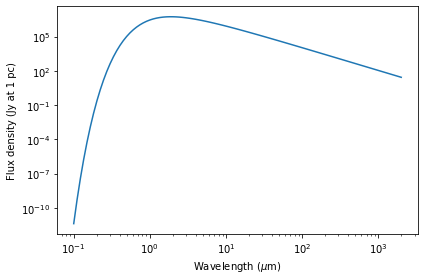

In [7]:
import plot_r3d_functions as p3d
p3d.plot_sed('../r3dsims/spectrum_duststar_1e-02.out')

/home/joachim/exwings/exwings-codes/plot_r3d_functions.py:157: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


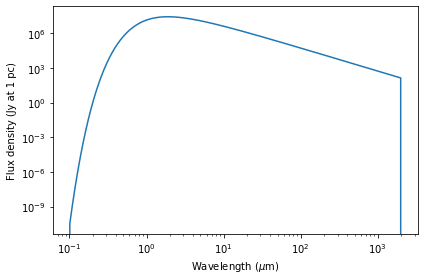

In [2]:
import plot_r3d_functions as p3d
p3d.plot_sed('../r3dsims/spectrum_blackbodystar.out')

mass: 1e-50, lum: 4.90456819580126e-41
mass: 1e-40, lum: 4.90456819580126e-31
mass: 1e-30, lum: 4.904568195801259e-21
mass: 1e-20, lum: 4.904568195800938e-11
mass: 1e-10, lum: 0.490121152894993
mass: 1e-08, lum: 45.85186917683102
mass: 1e-06, lum: 439.20696469469726
mass: 2e-06, lum: 442.0180337723859
mass: 3e-06, lum: 442.37723338412496
mass: 5e-06, lum: 442.51391128391924
mass: 7e-06, lum: 442.5403844752135
mass: 9e-06, lum: 442.54879605158277
mass: 2e-05, lum: 442.5558650966504
mass: 4e-05, lum: 442.55651485365684
mass: 6e-05, lum: 442.5565813437619
mass: 8e-05, lum: 442.55659760774677
mass: 1e-04, lum: 442.55660340183186
mass: 1e-02, lum: 442.5566093419764
mass: 1e+00, lum: 442.5566093419764
mass: 1e+02, lum: 442.5566093419764
mass: 1e+04, lum: 442.5566093419764


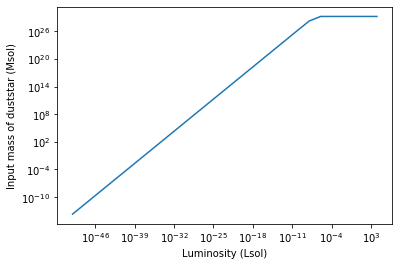

In [9]:
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt

#l1 = a3d.compute_luminosity(
#    path='../r3dsims/spectrum_blackbodystar.out',distance=1
#)


duststarmass = [
    1e-50,1e-40,1e-30,1e-20,1e-10,1e-8,1e-6,
    2e-6,3e-6,5e-6,7e-6,9e-6,2e-5,4e-5,6e-5,8e-5,
    1e-4,1e-2,1,1e2,1e4
]

Lsol = 3.828e26 # Watt

lumduststar = []

for mass in duststarmass:
    l = a3d.compute_luminosity(
        path=f'../r3dsims/spectrum_duststar_{mass:.0e}.out',distance=1
    )
    print(f'mass: {mass:.0e}, lum: {l/Lsol}')

    lumduststar.append(l)

plt.plot(duststarmass,lumduststar)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Luminosity (Lsol)');
plt.ylabel('Input mass of duststar (Msol)');



